In [821]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import random
import scipy.stats as stats

In [611]:
stats_features = [
         'MIN',
         'FG3M',
         'FG3A',
         'OREB',
         'DREB',
         'AST',
         'STL',
         'TOV',
         'BLK']

In [612]:
stats_targets = ['PTS']

In [613]:
# Read in per game data from csv folder
two_twenty = pd.read_csv('C:/Users/User/Desktop/Python/Projects/Nba Stats/leaguedashplayerstats_LeagueDashPlayerStats__PerMode-PerGame_LeagueID-00_Season-2019-20_SeasonType-Regular Season.csv', header = 0)

In [614]:
def important(stats):
    stats = stats[['PLAYER_NAME','PLAYER_ID','SEASON_ID','GP','AGE','MIN','FGM','FGA','FG_PCT','FG3M','FG3A','FG3_PCT','FTM','FTA','FT_PCT','OREB','DREB','AST','TOV','STL','BLK','PTS']]
    return stats

In [615]:
df = important(df)

In [616]:
df_cleaned = df.dropna()

In [617]:
df_cleaned = df_cleaned.set_index('PLAYER_ID')

In [618]:
df_cleaned

,PLAYER_NAME,SEASON_ID,GP,AGE,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,FTM,FTA,FT_PCT,OREB,DREB,AST,TOV,STL,BLK,PTS
PLAYER_ID,,,,,,,,,,,,,,,,,,,,,
203932,Aaron Gordon,2019-20,58,24,33.0,5.4,12.5,0.433,1.2,3.9,...,2.4,3.5,0.675,1.8,5.8,3.7,1.6,0.9,0.6,14.4
1628988,Aaron Holiday,2019-20,58,23,23.6,3.5,8.6,0.407,1.4,3.5,...,1.1,1.2,0.861,0.4,1.9,3.3,1.3,0.8,0.2,9.4
1627846,Abdel Nader,2019-20,48,26,15.8,2.1,4.6,0.455,0.8,2.2,...,1.0,1.3,0.774,0.3,1.6,0.7,0.8,0.4,0.4,6.0
1629690,Adam Mokoka,2019-20,11,21,10.2,1.1,2.5,0.429,0.5,1.4,...,0.2,0.4,0.500,0.6,0.3,0.4,0.2,0.4,0.0,2.9
1629678,Admiral Schofield,2019-20,27,23,10.8,1.1,2.8,0.400,0.5,1.7,...,0.3,0.5,0.692,0.2,1.0,0.5,0.3,0.3,0.1,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203897,Zach LaVine,2019-20,60,25,34.8,9.0,20.0,0.450,3.1,8.1,...,4.5,5.6,0.802,0.7,4.1,4.2,3.4,1.5,0.5,25.5
1629668,Zach Norvell Jr.,2019-20,5,22,8.2,0.6,2.4,0.250,0.6,1.6,...,0.2,0.2,1.000,0.0,1.2,0.6,0.6,0.4,0.0,2.0
1629015,Zhaire Smith,2019-20,7,20,4.6,0.4,1.6,0.273,0.0,0.4,...,0.3,0.6,0.500,0.0,0.3,0.3,0.3,0.4,0.0,1.1


In [619]:
x = df_cleaned[stats_features]

In [620]:
y = df_cleaned[stats_targets]

In [621]:
x

,MIN,FG3M,FG3A,OREB,DREB,AST,STL,TOV,BLK
PLAYER_ID,,,,,,,,,
203932,33.0,1.2,3.9,1.8,5.8,3.7,0.9,1.6,0.6
1628988,23.6,1.4,3.5,0.4,1.9,3.3,0.8,1.3,0.2
1627846,15.8,0.8,2.2,0.3,1.6,0.7,0.4,0.8,0.4
1629690,10.2,0.5,1.4,0.6,0.3,0.4,0.4,0.2,0.0
1629678,10.8,0.5,1.7,0.2,1.0,0.5,0.3,0.3,0.1
...,...,...,...,...,...,...,...,...,...
203897,34.8,3.1,8.1,0.7,4.1,4.2,1.5,3.4,0.5
1629668,8.2,0.6,1.6,0.0,1.2,0.6,0.4,0.6,0.0
1629015,4.6,0.0,0.4,0.0,0.3,0.3,0.4,0.3,0.0


In [622]:
y.head()

,PTS
PLAYER_ID,
203932,14.4
1628988,9.4
1627846,6.0
1629690,2.9
1629678,3.1


In [727]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=random.randint(1,300))

In [728]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [729]:
y_prediction = regressor.predict(x_test)

In [730]:
y_test.describe()

,PTS
count,155.000000
mean,8.663871
std,7.067622
min,0.000000
25%,3.200000
50%,6.300000
75%,12.150000
max,29.600000


In [731]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [732]:
print(RMSE)

2.1544878086617323


In [733]:
regressor = DecisionTreeRegressor(max_depth=20)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=20,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [734]:
y_prediction = regressor.predict(x_test)

In [735]:
y_test.describe()

,PTS
count,155.000000
mean,8.663871
std,7.067622
min,0.000000
25%,3.200000
50%,6.300000
75%,12.150000
max,29.600000


In [736]:
y.describe()

,PTS
count,514.000000
mean,8.645136
std,6.563478
min,0.000000
25%,3.800000
50%,7.200000
75%,12.000000
max,34.400000


In [737]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [738]:
print(RMSE)

2.800575977625248


In [739]:
pts_prediction = pd.DataFrame(y_prediction)

In [740]:
pts_prediction.columns = ['PTS']

In [741]:
pts_prediction.describe()

,PTS
count,155.000000
mean,8.763226
std,6.513204
min,0.000000
25%,4.200000
50%,7.400000
75%,12.000000
max,30.500000


In [742]:
pts_prediction.max()

PTS    30.5
dtype: float64

In [743]:
y_test.max()

PTS    29.6
dtype: float64

In [744]:
y_test

,PTS
PLAYER_ID,
1627982,1.0
203944,19.5
1629635,6.4
1629012,20.8
203077,2.5
...,...
201933,15.5
1626259,0.9
1629117,2.1


In [745]:
pts_prediction

,PTS
0,4.3
1,17.7
2,6.1
3,16.1
4,4.6
...,...
150,12.7
151,1.2
152,1.6
153,10.3


In [746]:
def percent_error(predicted, actual):
    perc_error = ((predicted-actual)/actual)*100
    return perc_error

In [747]:
predicted_mean = pts_prediction.describe().iloc[1]

In [748]:
population_mean = y.describe().iloc[1]

In [749]:
y_test_mean = y_test.describe().iloc[1]

In [759]:
y_test_mean[0]

8.663870967741943

In [750]:
percent_error(predicted_mean,y_test_mean)

PTS    1.146772
Name: mean, dtype: float64

In [751]:
percent_error(predicted_mean,population_mean)

PTS    1.365966
Name: mean, dtype: float64

In [810]:
df_for_correlation

0.9177018331977324

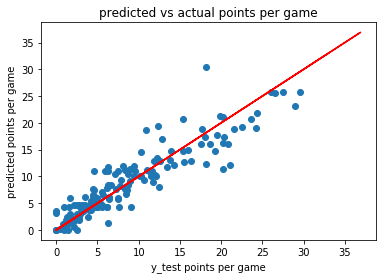

In [834]:
plt.scatter(y_test,pts_prediction)
plt.xlabel('y_test points per game')
plt.ylabel('predicted points per game')
plt.title('predicted vs actual points per game')
plt.plot(x, x + 0, color='red')
stats.pearsonr(y_test_array.flatten(),pts_prediction_array.flatten())[0]

In [828]:
y_test_array = y_test.to_numpy()

In [838]:
y_test_array[:5]

array([[ 1. ],
       [19.5],
       [ 6.4],
       [20.8],
       [ 2.5]])

In [836]:
pts_prediction_array = pts_prediction.to_numpy()

In [840]:
pts_prediction_array[:5]

array([[ 4.3],
       [17.7],
       [ 6.1],
       [16.1],
       [ 4.6]])